In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlin inline

UsageError: Line magic function `%matplotlin` not found.


In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA

#### we will just out a simple pairplot for this small dataset.

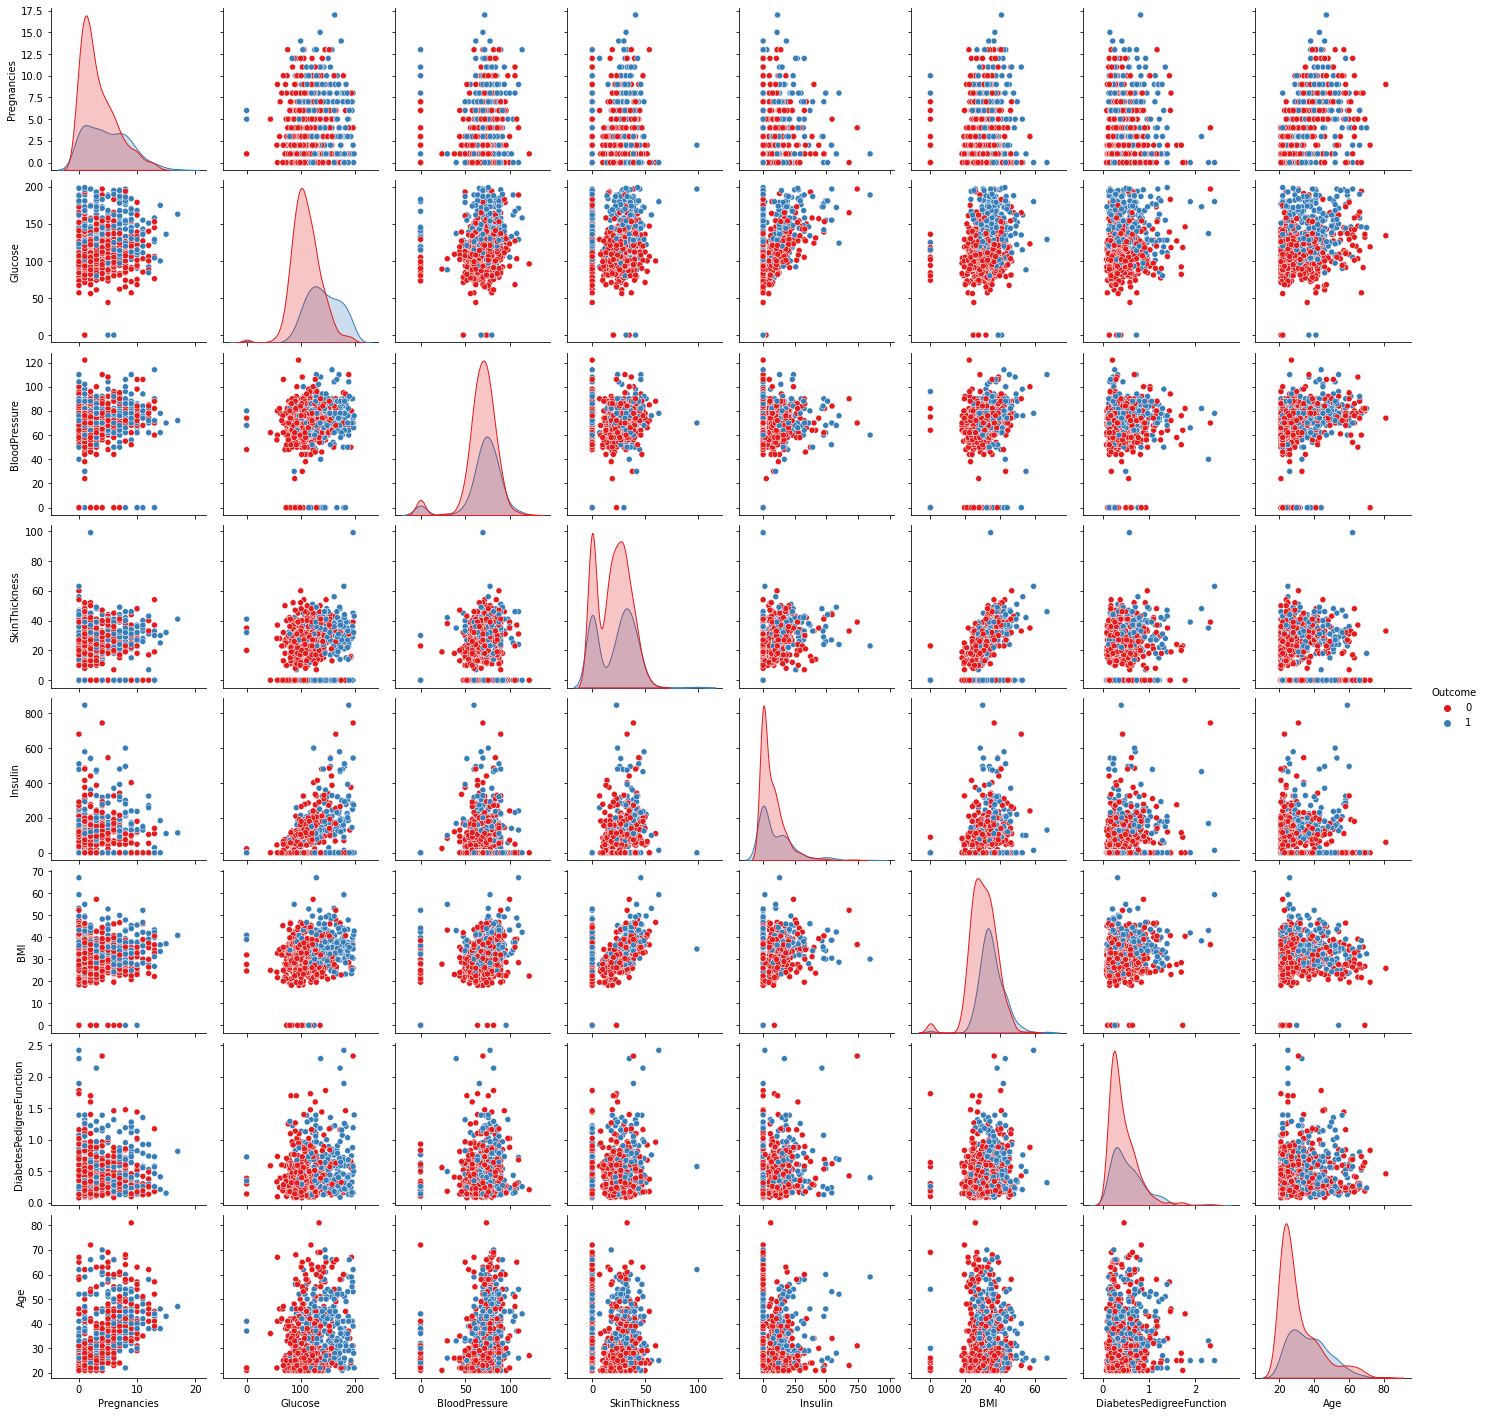

In [7]:
a=sns.pairplot(df,hue='Outcome',palette='Set1')

### Train Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [70]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Outcome',axis= 1),df['Outcome'],test_size = 0.3)

### Decision Trees

We'll start just by training a single decision tree.

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
dtree = DecisionTreeClassifier ()

In [18]:
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

### Prediction and Evaluation

Let's evaluate our decision tree.

In [25]:
prediction = dtree.predict(x_test)

In [26]:
from sklearn.metrics import classification_report,confusion_matrix 

In [36]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81       153
           1       0.62      0.67      0.64        78

    accuracy                           0.75       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.75      0.75       231



In [37]:
print(confusion_matrix(y_test,prediction))

[[121  32]
 [ 26  52]]


### Tree Visualization

Scikit learn actually has some built-in visualization capabilities for decision trees, you won't use this often and it requires you to install the pydot library, but here is an example of what it looks like and the code to execute this:

In [48]:
from IPython.display import Image
from sklearn.tree import export_graphviz

In [47]:
from sklearn.externals.six import StringIO
import pydot

ModuleNotFoundError: No module named 'sklearn.externals.six'

In [49]:
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

NameError: name 'dot_data' is not defined

## Random Forests

Now let's compare the decision tree model to a random forest.

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [65]:
rfc_pred = rfc.predict(x_test)

In [67]:
print(confusion_matrix(y_test,rfc_pred))

[[134  19]
 [ 29  49]]


In [68]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       153
           1       0.72      0.63      0.67        78

    accuracy                           0.79       231
   macro avg       0.77      0.75      0.76       231
weighted avg       0.79      0.79      0.79       231



##### The End!